# Building Chatbots with the OpenAI API and Pinecone

In this project, we aim to explore the fascinating world of AI chatbots. We will be using LangChain, OpenAI, and Pinecone vector DB, to build a chatbot capable of learning from the external world using **R**etrieval **A**ugmented **G**eneration (RAG).

We will be using a dataset sourced from the Llama 2 ArXiv paper and other related papers to help our chatbot answer questions about the latest and greatest in the world of GenAI.

This project is designed for learners who have a basic understanding of the OpenAI API and Pinecone, as covered in our previous projects. It's a great opportunity for those interested in AI, machine learning, and NLP to get hands-on experience with building a chatbot with RAG.


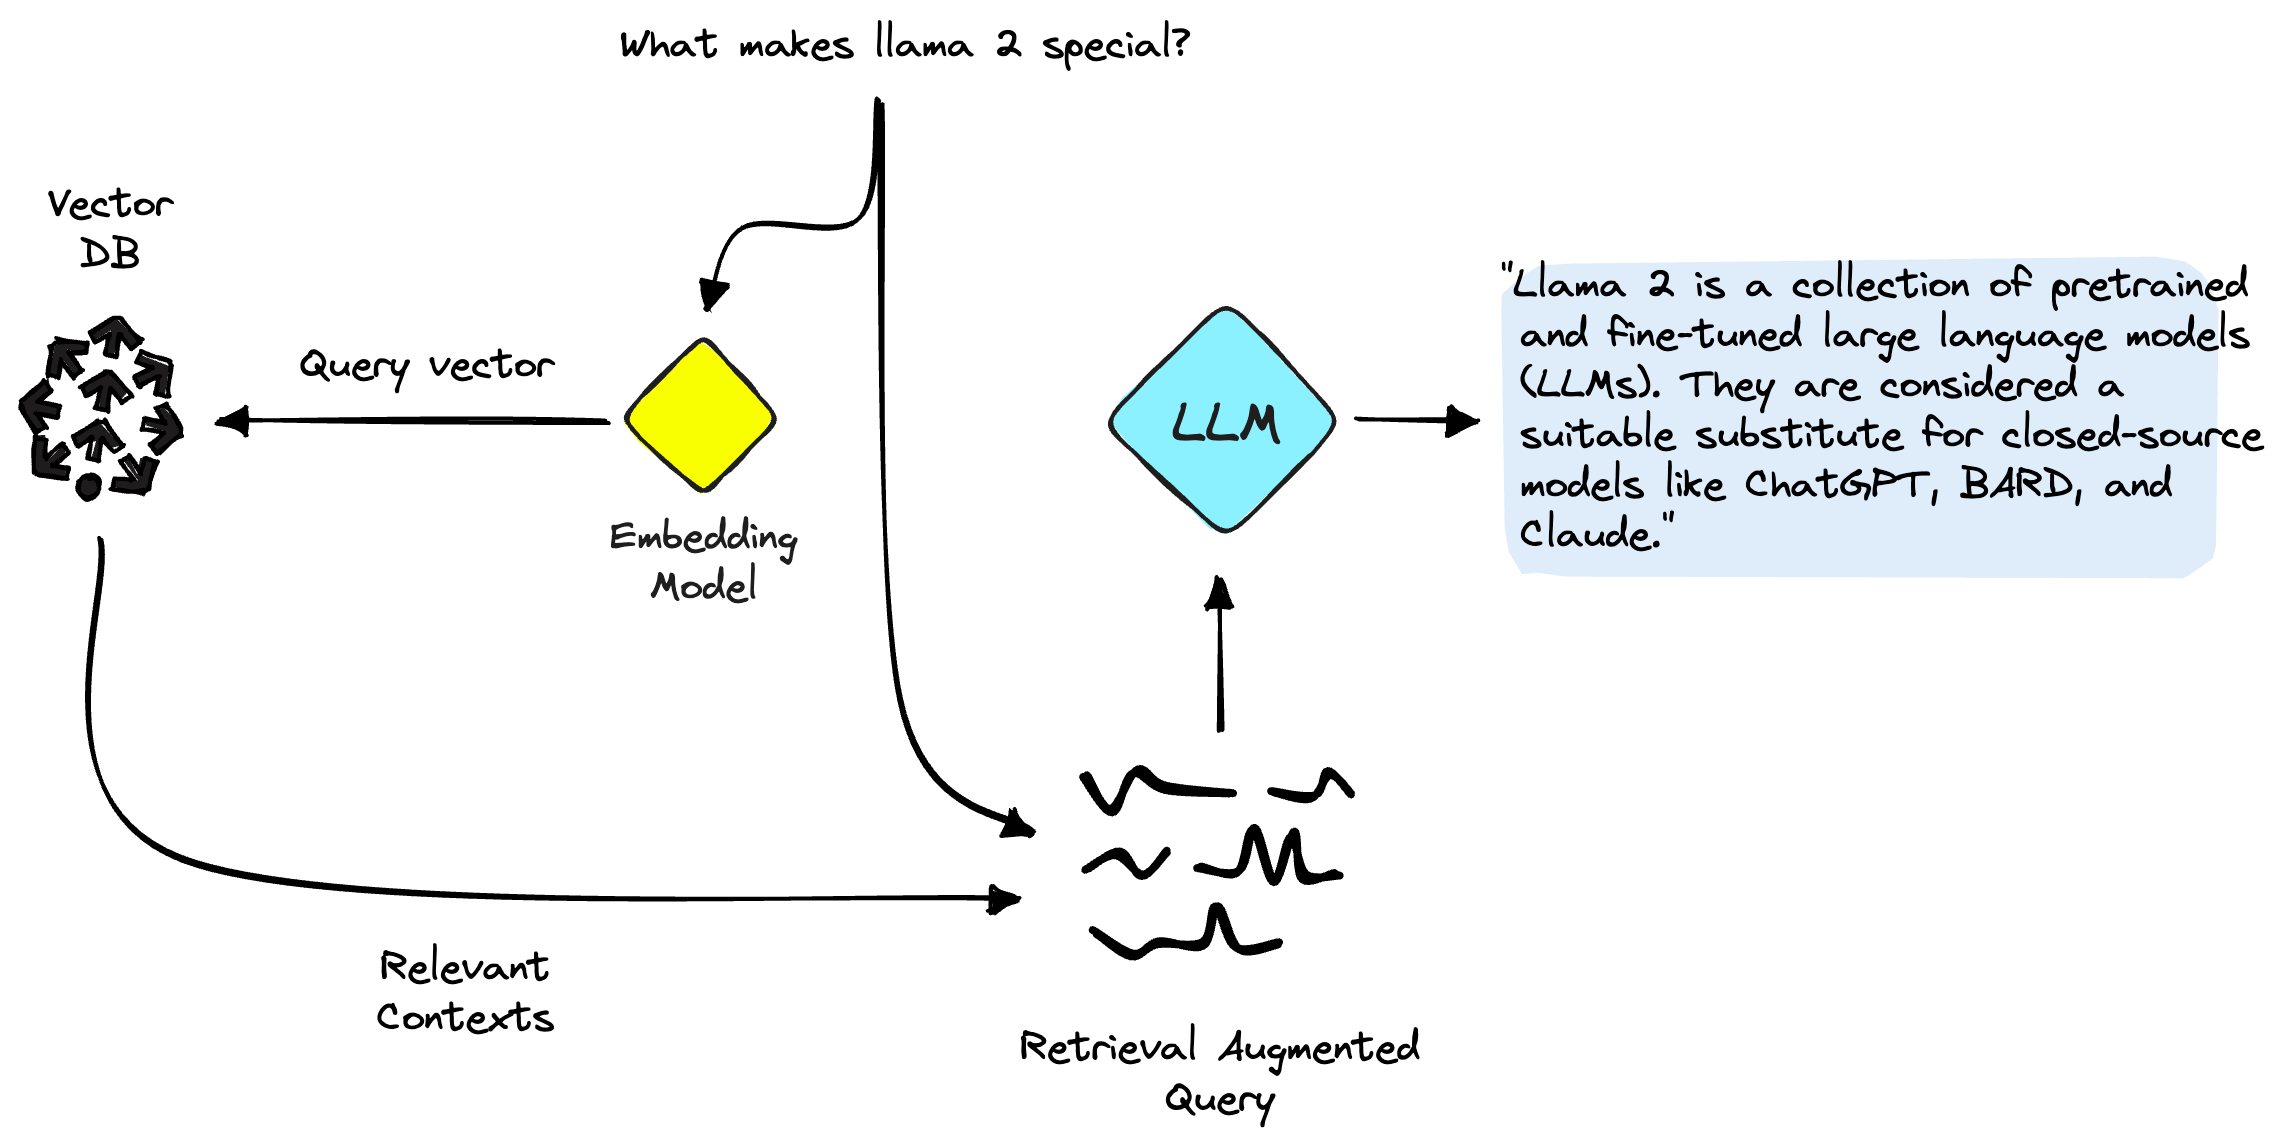

By the end of this project, you will have a functioning chatbot and RAG pipeline that can hold a conversation and provide informative responses based on a knowledge base. This project is a stepping stone towards understanding and building more complex AI systems in the future.

## Before you begin

You'll need to get an [OpenAI API key](https://platform.openai.com/account/api-keys) and [Pinecone API key](https://app.pinecone.io). 

## Task 0: Setup

Before we start building our chatbot, we need to install some Python libraries. Here's a brief overview of what each library does:

- **langchain**: This is a library for GenAI. We'll use it to chain together different language models and components for our chatbot.
- **openai**: This is the official OpenAI Python client. We'll use it to interact with the OpenAI API and generate responses for our chatbot.
- **datasets**: This library provides a vast array of datasets for machine learning. We'll use it to load our knowledge base for the chatbot.
- **pinecone-client**: This is the official Pinecone Python client. We'll use it to interact with the Pinecone vector DB where we will store our chatbot's knowledge base.
- **tiktoken**: This is a library from OpenAI that allows you to count the number of tokens in a text string without making an API call.

You can install these libraries using pip like so:

In [1]:
!pip install -qU \
    langchain==0.0.292 \
    openai==0.28.0 \
    datasets==2.10.1 \
    pinecone-client==2.2.4 \
    tiktoken==0.5.1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gremlinpython 3.6.1 requires aiohttp<=3.8.1,>=3.8.0, but you have aiohttp 3.9.1 which is incompatible.


## Task 1: Building a Chatbot

We will be relying heavily on the LangChain library to bring together the different components needed for our chatbot. To get more familiar with the library let's first create a chatbot _without_ RAG.


### Instructions

Initialize the chat model object.

- *Make sure you have defined the `OPENAI_API_KEY` environment variable and connected it. See the 'Setting up Workspace Integrations' section of getting-started.ipynb.*
- From langchain's chat_models module, import `ChatOpenAI`.
- Initialize a `ChatOpenAI` object with the `gpt-3.5-turbo` model. Assign to `chat`.

In [2]:
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-3.5-turbo")

### How are chats structured?

Chats with OpenAI's `gpt-3.5-turbo` and `gpt-4` chat models are typically structured (in plain text) like this:

```
System: You are a helpful assistant.

User: Hi AI, how are you today?

Assistant: I'm great thank you. How can I help you?

User: I'd like to understand string theory.

Assistant:
```

The final `"Assistant:"` without a response is what would prompt the model to continue the conversation. In the official OpenAI `ChatCompletion` endpoint these would be passed to the model in a format like:

```python
[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hi AI, how are you today?"},
    {"role": "assistant", "content": "I'm great thank you. How can I help you?"}
    {"role": "user", "content": "I'd like to understand string theory."}
]
```

In LangChain there is a slightly different format. We use three _message_ objects like so:

```python
messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Hi AI, how are you today?"),
    AIMessage(content="I'm great thank you. How can I help you?"),
    HumanMessage(content="I'd like to understand string theory.")
]
```

The format is very similar, we're just swapped the role of `"user"` for `HumanMessage`, and the role of `"assistant"` for `AIMessage`.

### Instructions

Create a conversation.

- From langchain's schema module, import the three message types: `SystemMessage`, `HumanMessage`, and `AIMessage`.
- Create a conversation as a list of messages. Assign to `messages`.
    1. A system message with content `"You are a helpful assistant."`
    2. A human message with content `"Hi AI, how are you today?"`
    3. An AI message with content `"I'm great thank you. How can I help you?"`
    4. A human message with content `"I'd like to understand string theory."`


In [4]:
from langchain.schema import (
    SystemMessage,
    HumanMessage,
    AIMessage
)

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Hi AI, how are you today?"),
    AIMessage(content="I'm great thank you. How can I help you?"),
    HumanMessage(content="I'd like to understand string theory.")
]

We generate the next response from the AI by passing these messages to the `ChatOpenAI` object. You can call `chat` as though it is a function.

### Instructions

Chat with GPT.

- Pass the messages to the chat and get a response. Assign to `res`.
- Print the response.

In [5]:
res = chat(messages)

res

AIMessage(content="String theory is a theoretical framework in physics that aims to describe the fundamental structure of the universe. It suggests that elementary particles, such as electrons and quarks, are not point-like particles, but rather tiny, vibrating strings. These strings have different vibrational modes, and each mode corresponds to a different particle with unique properties, such as mass and charge.\n\nThe theory incorporates both quantum mechanics and general relativity, attempting to reconcile the two fundamental theories of physics. It suggests that there are more dimensions than the four we commonly experience (three spatial dimensions and one time dimension), possibly up to 10 or even 11 dimensions. These extra dimensions are thought to be compactified or curled up, making them undetectable at our scale.\n\nString theory also proposes the existence of additional particles called gravitons, which mediate the force of gravity. This could potentially explain the nature

Notice that the `AIMessage` object looks a bit like a dictionary. The most important element is `content`, which contains the chat text.

### Instructions

Print only the contents of the response.

In [6]:
print(res.content)

String theory is a theoretical framework in physics that aims to describe the fundamental structure of the universe. It suggests that elementary particles, such as electrons and quarks, are not point-like particles, but rather tiny, vibrating strings. These strings have different vibrational modes, and each mode corresponds to a different particle with unique properties, such as mass and charge.

The theory incorporates both quantum mechanics and general relativity, attempting to reconcile the two fundamental theories of physics. It suggests that there are more dimensions than the four we commonly experience (three spatial dimensions and one time dimension), possibly up to 10 or even 11 dimensions. These extra dimensions are thought to be compactified or curled up, making them undetectable at our scale.

String theory also proposes the existence of additional particles called gravitons, which mediate the force of gravity. This could potentially explain the nature of gravity within the 

Because `res` is just another `AIMessage` object, we can append it to `messages`, add another `HumanMessage`, and generate the next response in the conversation.

### Instructions

Continue the conversation with GPT.

- Append the latest AI response to messages.
- Create a new human message. Assign to `prompt`.
    - Use the content `"Why do physicists believe it can produce a 'unified theory'?"`
- Append the prompt to messages.
- Send the messages to GPT. Assign to `res`.
- Print the contents of the response.

In [7]:
messages.append(res)

In [8]:
prompt = HumanMessage(content="Why do physicists believe it can produce a 'unified theory'?")

messages.append(prompt)

In [9]:
messages

[SystemMessage(content='You are a helpful assistant.', additional_kwargs={}),
 HumanMessage(content='Hi AI, how are you today?', additional_kwargs={}, example=False),
 AIMessage(content="I'm great thank you. How can I help you?", additional_kwargs={}, example=False),
 HumanMessage(content="I'd like to understand string theory.", additional_kwargs={}, example=False),
 AIMessage(content="String theory is a theoretical framework in physics that aims to describe the fundamental structure of the universe. It suggests that elementary particles, such as electrons and quarks, are not point-like particles, but rather tiny, vibrating strings. These strings have different vibrational modes, and each mode corresponds to a different particle with unique properties, such as mass and charge.\n\nThe theory incorporates both quantum mechanics and general relativity, attempting to reconcile the two fundamental theories of physics. It suggests that there are more dimensions than the four we commonly expe

In [10]:
res = chat(messages)

print(res.content)

Physicists believe that string theory has the potential to produce a unified theory because it incorporates both quantum mechanics and general relativity, two fundamental theories that have been incredibly successful in explaining different aspects of the physical world but are incompatible with each other.

Quantum mechanics describes the behavior of particles at the microscopic level, where the laws of probability and uncertainty play a significant role. On the other hand, general relativity describes the force of gravity and the behavior of massive objects at the cosmic scale, where spacetime is curved.

However, when physicists try to combine quantum mechanics with general relativity, they encounter mathematical inconsistencies and infinities. This is known as the problem of quantum gravity. String theory attempts to overcome these issues by replacing point-like particles with tiny vibrating strings. By doing so, it introduces a fundamental length scale and resolves some of the mat

## Task 2: Hallucinations

We have our chatbot, but as mentioned—the knowledge of LLMs can be limited. The reason for this is that LLMs learn all they know during training. An LLM essentially compresses the "world" as seen in the training data into the internal parameters of the model. We call this knowledge the _parametric knowledge_ of the model.



By default, LLMs have no access to the external world.

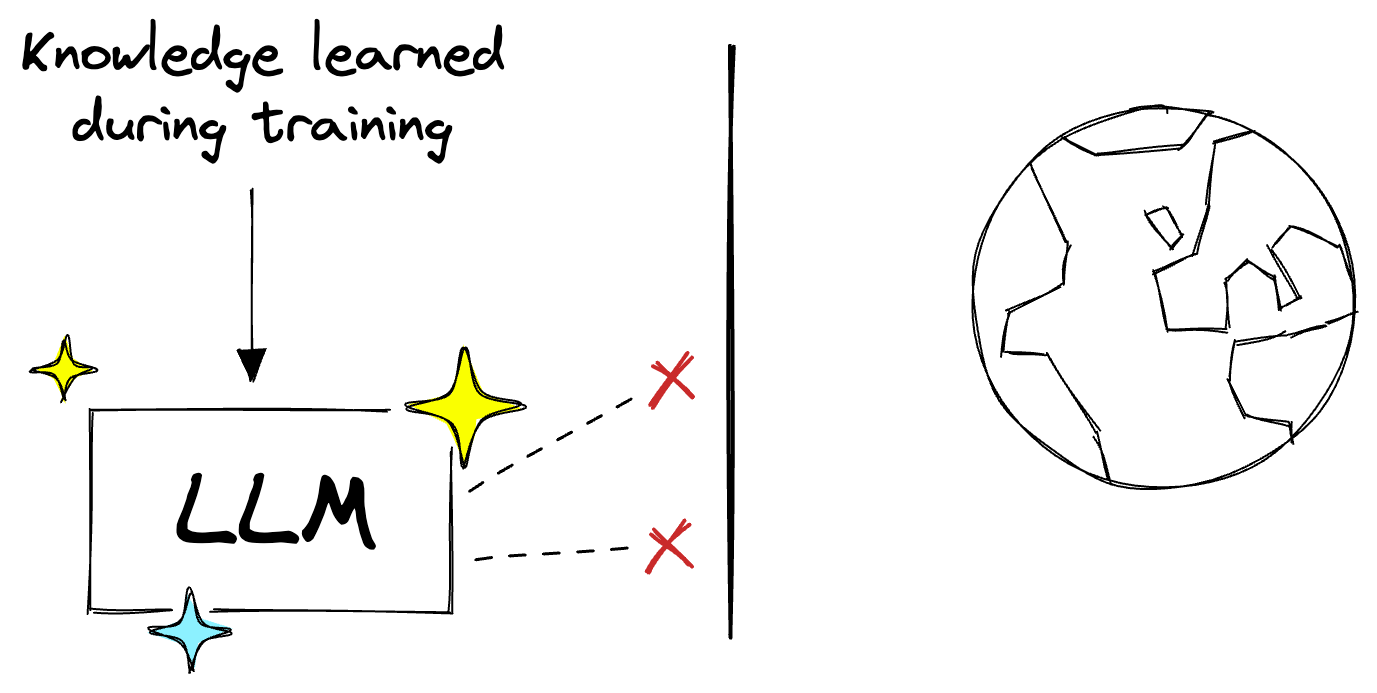

This means that GPT (or any other LLM) will perform badly on some types of question.

* The chatbot doesn't know about recent events. How does it respond if you ask about the weather in your city today?
* It can't answer questions about recent code or recent products. Try asking it `"Can you tell me about the LLMChain in LangChain?"` or `"What was the latest course released on DataCamp?"`
* It can't answer questions about confidential corporate information that hasn't been released into the internet.

### Instructions

Ask GPT about the new (and very popular) Llama 2 LLM.

- Append the latest AI response to `messages`.
- Create a new human message. Assign to `prompt`.
    - Use the content `"What is so special about Llama 2?"`.
- Append the prompt to `messages`.
- Send the messages to GPT. Assign to `res`.
- Print the contents of the response.

In [11]:
print(len(messages))
messages.append(res)
print(len(messages))

6
7


In [12]:
prompt = HumanMessage(content="What is so special about Llama 2?")
messages.append(prompt)

res = chat(messages)
print(res.content)

I'm sorry, but I don't have any information about a specific entity or concept referred to as "Llama 2." It's possible that you might be referring to something that I am not familiar with. Could you please provide more context or clarify your question?


### Confidently wrong: hallucinations from LLMs

Our chatbot can no longer help us, it doesn't contain the information we need to answer the question. It was very clear from this answer that the LLM doesn't know the information, but sometimes an LLM may respond like it _does_ know the answer—and this can be very hard to detect. See this example from the earliest version of GPT-4 in the OpenAI Playground:

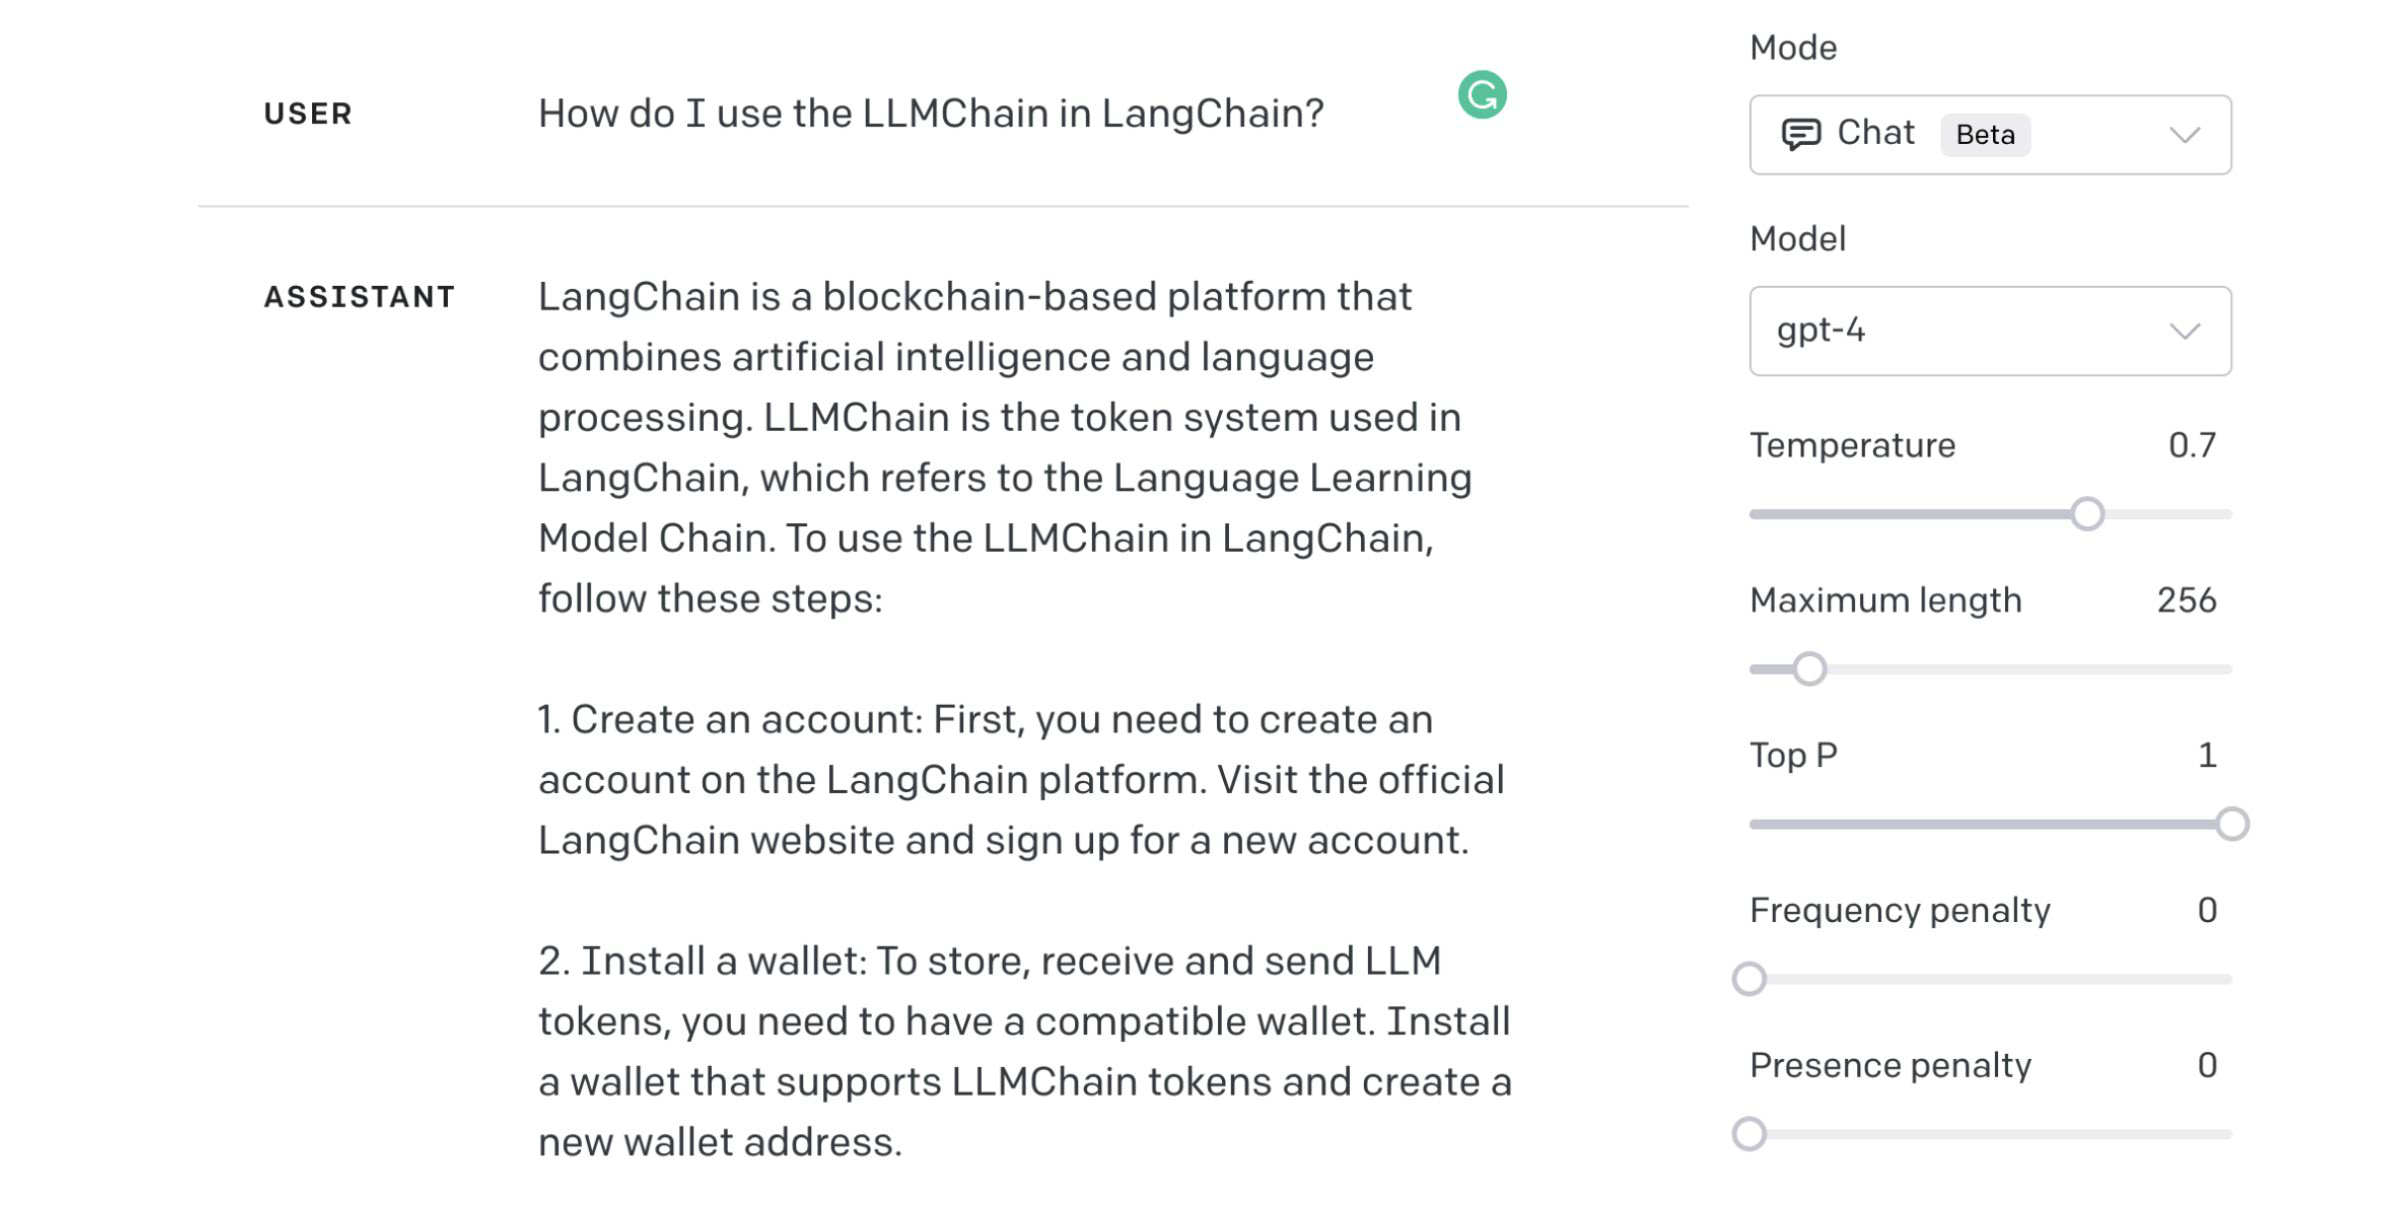

OpenAI have since adjusted the behavior for this particular example as we can see below:


### Instructions

Ask GPT about LangChain.

- Append the latest AI response to `messages`.
- Create a new human message. Assign to `prompt`.
    - Use the content `"Can you tell me about the LLMChain in LangChain?"`.
- Append the prompt to `messages`.
- Send the messages to GPT. Assign to `res`.
- Print the contents of the response.

In [13]:
messages.append(res)
prompt = HumanMessage(content="Can you tell me about the LLMChain in LangChain?")
messages.append(prompt)

res = chat(messages)
print(res.content)

I apologize, but I'm not familiar with the specific terms "LLMChain" or "LangChain." It's possible that these terms are related to a particular project, technology, or concept that I am not aware of. Without more context or information, I won't be able to provide you with a detailed explanation. Could you please provide more details or clarify your question further?


There is another way of feeding knowledge into LLMs. It is called _source knowledge_ and it refers to any information fed into the LLM via the prompt. We can try that with the LLMChain question. We can take a description of this object from the LangChain documentation.

### Instructions

Create a string of knowledge about chains.

- *Read the descriptions of LLMChains, Chains, and LangChain given in `llmchain_information`.*
- Combine the list of description strings into a single string. Assign to `source_knowledge`.

In [14]:
# A description of LLMChains, Chains, and LangChain 
llmchain_information = [
    "A LLMChain is the most common type of chain. It consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser. This chain takes multiple input variables, uses the PromptTemplate to format them into a prompt. It then passes that to the model. Finally, it uses the OutputParser (if provided) to parse the output of the LLM into a final format.",
    "Chains is an incredibly generic concept which returns to a sequence of modular components (or other chains) combined in a particular way to accomplish a common use case.",
    "LangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model via an api, but will also: (1) Be data-aware: connect a language model to other sources of data, (2) Be agentic: Allow a language model to interact with its environment. As such, the LangChain framework is designed with the objective in mind to enable those types of applications."
]
len(llmchain_information)

3

In [15]:
source_knowledge = "\n".join(llmchain_information)
source_knowledge

'A LLMChain is the most common type of chain. It consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser. This chain takes multiple input variables, uses the PromptTemplate to format them into a prompt. It then passes that to the model. Finally, it uses the OutputParser (if provided) to parse the output of the LLM into a final format.\nChains is an incredibly generic concept which returns to a sequence of modular components (or other chains) combined in a particular way to accomplish a common use case.\nLangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model via an api, but will also: (1) Be data-aware: connect a language model to other sources of data, (2) Be agentic: Allow a language model to interact with its environment. As such, the LangChain framework is designed with the objective in mind to enable those

We can feed this additional knowledge into our prompt with some instructions telling the LLM how we'd like it to use this information alongside our original query.

### Instructions

- Define a question. Assign to `query`.
    - Use the text `"Can you tell me about the LLMChain in LangChain?"`
- Create an augmented prompt containing the context and query. Assign to `augmented_prompt`.

        augmented_prompt = f"""Using the contexts below, answer the query.

        Contexts:
        {source_knowledge}

        Query: {query}"""

In [16]:
query = "Can you tell me about the LLMChain in LangChain?"

augmented_prompt = f"""Using the contexts below, answer the query. If some information is not provided within
the contexts below, do not include, and if the query cannot be answered with the below information, say "I don't know".

Contexts:
{source_knowledge}

Query: {query}"""

In [17]:
print(augmented_prompt)

Using the contexts below, answer the query. If some information is not provided within
the contexts below, do not include, and if the query cannot be answered with the below information, say "I don't know".

Contexts:
A LLMChain is the most common type of chain. It consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser. This chain takes multiple input variables, uses the PromptTemplate to format them into a prompt. It then passes that to the model. Finally, it uses the OutputParser (if provided) to parse the output of the LLM into a final format.
Chains is an incredibly generic concept which returns to a sequence of modular components (or other chains) combined in a particular way to accomplish a common use case.
LangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model via an api, but will also: (1) Be data-awa

Now we feed this into our chatbot as we did before.

Don't append the previous AI message, since it wasn't a good answer.

### Instructions

Ask GPT about LangChain again, this time providing source knowledge.

- Create a new human message. Assign to `prompt`.
    - Use `augmented_prompt` as the content.
- Append the prompt to `messages`.
- Send the messages to GPT. Assign to `res`.
- Print the contents of the response.

In [18]:
print(messages[-1])

content='Can you tell me about the LLMChain in LangChain?' additional_kwargs={} example=False


In [19]:
messages[-1] = HumanMessage(content=augmented_prompt)

In [20]:
res = chat(messages)
print(res.content)

Based on the provided context, it appears that the LLMChain is a type of chain within the LangChain framework for developing applications powered by language models. The LLMChain consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser.

The purpose of the LLMChain is to take multiple input variables, format them into a prompt using the PromptTemplate, and then pass that prompt to the language model (LLM or ChatModel). Finally, if an OutputParser is provided, it is used to parse the output of the language model into a final format.

In summary, the LLMChain is a component of the LangChain framework that facilitates the integration of language models into applications by providing a structure for handling input variables, formatting prompts, and parsing the model's output.


The quality of this answer is phenomenal! This is made possible thanks to the idea of augmented our query with external knowledge (source knowledge). There's just one problem—how do we get this information in the first place?

We learned in the previous code-alongs about Pinecone and vector databases. Well, they can help us here too. But first, we'll need a dataset.

## Task 3: Importing the Data

In this task, we will be importing our data. We will be using the Hugging Face Datasets library and [the `"jamescalam/llama-2-arxiv-papers"` dataset](https://huggingface.co/datasets/jamescalam/llama-2-arxiv-papers-chunked). This dataset contains a collection of ArXiv papers which will serve as the external knowledge base for our chatbot.

### Instructions

Load the ArXiv papers dataset.

- From the *datasets* package, import `load_dataset`.
- Load the train split of the `jamescalam/llama-2-arxiv-papers-chunked` dataset. Assign to `dataset`.
- Print the dataset object to see the structure of the data.
- *Look at the structure. Which fields should we keep?*

In [21]:
from datasets import load_dataset

data = load_dataset("jamescalam/llama-2-arxiv-papers-chunked", split="train")
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /home/repl/.cache/huggingface/datasets/jamescalam___json/jamescalam--llama-2-arxiv-papers-chunked-ea255a807f3039a6/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


Dataset({
    features: ['doi', 'chunk-id', 'chunk', 'id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'references'],
    num_rows: 4838
})

### Instructions

Print a record of dataset to get a feel for what they contain.

In [22]:
data[0]

{'doi': '1102.0183',
 'chunk-id': '0',
 'chunk': 'High-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nTechnical Report No. IDSIA-01-11\nJanuary 2011\nIDSIA / USI-SUPSI\nDalle Molle Institute for Arti\x0ccial Intelligence\nGalleria 2, 6928 Manno, Switzerland\nIDSIA is a joint institute of both University of Lugano (USI) and University of Applied Sciences of Southern Switzerland (SUPSI),\nand was founded in 1988 by the Dalle Molle Foundation which promoted quality of life.\nThis work was partially supported by the Swiss Commission for Technology and Innovation (CTI), Project n. 9688.1 IFF:\nIntelligent Fill in Form.arXiv:1102.0183v1  [cs.AI]  1 Feb 2011\nTechnical Report No. IDSIA-01-11 1\nHigh-Performance Neural Networks\nfor Visual Object Classi\x0ccation\nDan C. Cire\x18 san, Ueli Meier, Jonathan Masci,\nLuca M. Gambardella and J\x7f urgen Schmidhuber\nJanuary 2011\nAbs

### Dataset Summary

The dataset we are using is sourced from the Llama 2 ArXiv papers. It is a collection of academic papers from ArXiv, a repository of electronic preprints approved for publication after moderation. Each entry in the dataset represents a "chunk" of text from these papers.

Because most **L**arge **L**anguage **M**odels (LLMs) only contain knowledge of the world as it was during training, they cannot answer our questions about Llama 2—at least not without this data.

## Task 4: Building the Knowledge Base

We now have a dataset that can serve as our chatbot knowledge base. Our next task is to transform that dataset into the knowledge base that our chatbot can use. To do this we must use an embedding model and vector database.

### Workflow

The workflow for setting up a chatbot is much the same as for setting up semantic serach and retrieval augmented generation, as seen in previous code-alongs.

- Initialize your connection to the Pinecone vector DB.
- Create an index (remember to consider the dimensionality of `text-embedding-ada-002`).
- Initialize OpenAI's `text-embedding-ada-002` model with LangChain.
- Populate the index with records (in this case from the Llama 2 dataset).

### Instructions

Initialize Pinecone, getting setup details from Workspace environment variables.

- Import the os package.
- Import the pinecone package.
- Initialize pinecone, setting the API key and environment.

In [23]:
import os
import pinecone

pinecone.init(
    api_key=os.environ["PINECONE_API_KEY"],
    environment=os.environ["PINECONE_ENVIRONMENT"]
)

Then we initialize the index. We will be using OpenAI's `text-embedding-ada-002` model for creating the embeddings, so we set the `dimension` to `1536`.

### Instructions

Create a vector index in the Pinecone database.

- Import the time package.
- Choose a name for the vector index. Assign to `index_name`.
- Check if index_name is not in Pinecone's list of existing indexes.
    -  Create an index named index_name, dimension 1536, cosine similarity as its metric.
    -  While the index status is not ready, sleep for one second.
- Connect to the index. Assign to `index`.
- View the index stats.

In [24]:
import time

index_name = "llama-2-rag"

if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name, dimension=1536, metric="cosine"
    )
    while not pinecone.describe_index(index_name).status["ready"]:
        time.sleep(1)
        
index = pinecone.Index(index_name)

In [25]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

Our index is now ready but it's empty. It is a vector index, so it needs vectors. As mentioned, to create these vector embeddings we will OpenAI's `text-embedding-ada-002` model—we can access it via LangChain.

### Instructions

Create an embeddings model.

- From langchain's embeddings module and openai submodule, import `OpenAIEmbeddings`.
- Create an embedings model object for `text-embedding-ada-002`. Assign to `embed_model`.

In [26]:
from langchain.embeddings.openai import OpenAIEmbeddings

embed_model = OpenAIEmbeddings(model="text-embedding-ada-002")

Using this model we can create embeddings like so:

In [27]:
texts = [
    "this is a sentence",
    "this is another sentence"
]

res = embed_model.embed_documents(texts=texts)
len(res), len(res[0])

(2, 1536)

From this we get two (aligning to our two chunks of text) 1536-dimensional embeddings.

We're now ready to embed and index all our our data! We do this by looping through our dataset and embedding and inserting everything in batches.

### Instructions

Split the dataset into batches and add it to the vector index.

- From *tqdm*, import `tqdm` (a progress bar).
- Convert `dataset` to a pandas DataFrame to make it easier to iterate over the dataset.
- Set the batch size to 100. Assign to `batch_size`.
- Loop from 0 to the length of contexts by batch size, adding a progress bar.
    - Find the end of the batch. Assign to `i_end`.
    - Get the data records for the batch. Assign to `batch`.
    - Generate unique ids for each chunk. Assign to `ids`.
    - Get text to embed. Assign to `texts`.
    - Use the embedding model to embed the text documents. Assign to embeds.
    - Get text, source, and title metadata to store in Pinecone. Assign to metadata.
    - Upsert to Pinecone.

In [31]:
data[0]["doi"], data[1]["doi"], data[0]["chunk-id"], data[1]["chunk-id"]

('1102.0183', '1102.0183', '0', '1')

In [32]:
data

Dataset({
    features: ['doi', 'chunk-id', 'chunk', 'id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'references'],
    num_rows: 4838
})

In [33]:
from tqdm import tqdm

data = data.to_pandas()

batch_size = 100

for i in tqdm(range(0, len(data), batch_size)):
    i_end = min(i+batch_size, len(data))
    batch = data.iloc[i:i_end]
    ids = [f"{x['doi']}-{x['chunk-id']}" for _, x in batch.iterrows()]
    texts = [x["chunk"] for _, x in batch.iterrows()]
    embeds = embed_model.embed_documents(texts)
    metadata = [
        {"text": x["chunk"],
         "title": x["title"],
         "source": x["source"]} for _, x in  batch.iterrows()
    ]
    # [(id1, embed1, metadata1), (id2, embed2, metadata2), ...]
    index.upsert(vectors=zip(ids, embeds, metadata))

100%|██████████| 49/49 [01:14<00:00,  1.51s/it]


We can check that the vector index has been populated using `describe_index_stats` like before:

### Instructions

Check on updates to the vector index now that it contains the ArXiv dataset.

- View the index stats again.
- *What has changed since you last looked?*

In [34]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 4838}},
 'total_vector_count': 4838}

## Task 5: Retrieval Augmented Generation

In the previous task we built a fully-fledged knowledge base. Now it's time to connect that knowledge base to our chatbot. To do that we'll be diving back into LangChain and reusing our template prompt from earlier.

### Workflow

* Create a LangChain `vectorstore` object using our `index` and `embed_model`.
* Try searching for relevant information about Llama 2.
* Create a function (`augment_prompt`) that can take our query, retrieve information using the `vectorstore`, and merge them all into a single retrieval-augmented prompt.
* Try asking the chatbot Llama 2 questions with and without RAG, comparing the differences.

To use LangChain's RAG pipeline we need to load the LangChain abstraction for a vector index, called a `vectorstore`. We pass in our vector `index` to initialize the object.

### Instructions

Initialize the vector store object.

- From langchain's vectorstores module, import `Pinecone`.
- State the metadata field that contains our text (namely `"text"`). Assign to `text_field`.
- Initialize the vector store object. Assign to `vectorstore`.

In [35]:
from langchain.vectorstores import Pinecone

text_field = "text"

vectorstore = Pinecone(
    index, embed_model.embed_query, text_field
)

Using this `vectorstore` we can already query the index and see if we have any relevant information given our question about Llama 2.

### Instructions

Perform similarity search against a question.

- Define a question. Assign to query.
    - Use the text `"What is so special about Llama 2?"`.
- Perform a similarity search for the query, returning 3 results.

In [36]:
query = "What is so special about Llama 2?"

vectorstore.similarity_search(query, k=3)

[Document(page_content='Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang\nRoss Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang\nAngela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic\nSergey Edunov Thomas Scialom\x03\nGenAI, Meta\nAbstract\nIn this work, we develop and release Llama 2, a collection of pretrained and ﬁne-tuned\nlarge language models (LLMs) ranging in scale from 7 billion to 70 billion parameters.\nOur ﬁne-tuned LLMs, called L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc , are optimized for dialogue use cases. Our\nmodels outperform open-source chat models on most benchmarks we tested, and based on\nourhumanevaluationsforhelpfulnessandsafety,maybeasuitablesubstituteforclosedsource models. We provide a detailed description of our approach to ﬁne-tuning and safety', metadata={'source': 'http://arxiv.org/pdf/2307.09288', 'title': 'Llama 2: Open Foundation and Fine-Tun

We return a lot of text here and it's not that clear what we need or what is relevant. Fortunately, our LLM will be able to parse this information much faster than us. All we need is to connect the output from our `vectorstore` to our `chat` chatbot. To do that we can use the same logic as we used earlier.

### Instructions

Run the code to define a function to augment a prompt with knowledge base results.

In [40]:
def augment_prompt(query: str):
    results = vectorstore.similarity_search(query, k=3)
    source_knowledge = "\n".join([x.page_content for x in results])
    augmented_prompt = f"""Using the contexts below, answer the query. If some information is not provided within
the contexts below, do not include, and if the query cannot be answered with the below information, say "I don't know".

Contexts:
{source_knowledge}

Query: {query}"""
    return augmented_prompt

Using this we produce an augmented prompt:

In [42]:
print(augment_prompt(query))

Using the contexts below, answer the query. If some information is not provided within
the contexts below, do not include, and if the query cannot be answered with the below information, say "I don't know".

Contexts:
Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang
Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang
Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic
Sergey Edunov Thomas Scialom
GenAI, Meta
Abstract
In this work, we develop and release Llama 2, a collection of pretrained and ﬁne-tuned
large language models (LLMs) ranging in scale from 7 billion to 70 billion parameters.
Our ﬁne-tuned LLMs, called L/l.sc/a.sc/m.sc/a.sc /two.taboldstyle-C/h.sc/a.sc/t.sc , are optimized for dialogue use cases. Our
models outperform open-source chat models on most benchmarks we tested, and based on
ourhumanevaluationsforhelpfulnessandsafety,maybeasuitablesubstituteforclosedsource models

There is still a lot of text here, so let's pass it onto our chat model to see how it performs.

### Instructions

Ask GPT about LLama2, augmenting the prompt with source knowledge from the Pinecone vector index.

- Create a new human message. Assign to `prompt`.
    - Call `augment_prompt()` on the query and use this as the content.
- Append the prompt to `messages`.
- Send the messages to GPT. Assign to `res`.
- Print the contents of the response.

In [43]:
prompt = HumanMessage(content=augment_prompt(query))

messages.append(prompt)
res = chat(messages)
print(res.content)

Based on the provided context, it is mentioned that Llama 2 is a collection of pretrained and fine-tuned large language models (LLMs) ranging from 7 billion to 70 billion parameters. These LLMs, such as L/l.sc/a.sc/m.sc/a.sc/t.sc and L/l.sc/a.sc/m.sc/a.sc/t.sc-C/h.sc/a.sc/t.sc, are optimized for dialogue use cases. The models have been evaluated and found to outperform open-source chat models on most benchmarks tested, and they are considered as potential substitutes for closed-source models in terms of helpfulness and safety.

Furthermore, the authors describe their approach to fine-tuning and safety in detail, highlighting that closed-source LLMs are heavily fine-tuned to align with human preferences, enhancing their usability and safety. The development and release of Llama 2 aims to provide an open and efficient foundation for language models, allowing for advancements in AI alignment research.

However, it's important to note that the context provided is limited, and there may be 

We can continue with more Llama 2 questions. Let's try _without_ RAG first:

### Instructions

Ask GPT about LLama 2.

- Create a new human message. Assign to `prompt`.
    - Use the context `"What safety measures were used in the development of llama 2?"`.
- Send the messages plus the prompt to GPT. Assign to `res`.
    - *Don't use `.append()` here, as we don't want to store the latest message in the conversation.*
- Print the contents of the response.

In [44]:
prompt = HumanMessage(
    content="What safety measures were used in the development of llama 2?"
)

res = chat(messages + [prompt])
print(res.content)

Based on the provided context, the safety measures used in the development of Llama 2 are mentioned but not explicitly described. The text mentions that the fine-tuned LLMs in Llama 2, such as L/l.sc/a.sc/m.sc/a.sc/t.sc and L/l.sc/a.sc/m.sc/a.sc/t.sc-C/h.sc/a.sc/t.sc, are optimized for dialogue use cases and appear to be on par with some closed-source models in terms of safety. It also mentions that closed-source models are heavily fine-tuned to align with human preferences, enhancing their usability and safety.

However, the specific safety measures employed in the development of Llama 2 are not elaborated upon in the given information. It is possible that the paper or source from which this information is derived may provide more details on the safety measures utilized.


The chatbot is able to respond about Llama 2 thanks to it's conversational history stored in `messages`. However, it doesn't know anything about the safety measures themselves as we have not provided it with that information via the RAG pipeline. Let's try again but with RAG.

### Instructions

Ask GPT about LLama 2 again.

- Do the same thing again, but this time augment the prompt using `augment_prompt()`.

In [46]:
prompt = HumanMessage(
    content=augment_prompt("What safety measures were used in the development of llama 2?")
)

res = chat(messages + [prompt])
print(res.content)

According to the provided contexts, the safety measures used in the development of Llama 2 include safety-specific data annotation and tuning, red-teaming, iterative evaluations, and a thorough approach to improving the safety of the fine-tuned large language models (LLMs). These measures were taken to increase the safety of the models and ensure responsible development of LLMs. The paper also mentions that a detailed description of their fine-tuning methodology and safety approach is provided, which can further shed light on the specific safety measures implemented.


We get a much better informed response that includes several items missing in the previous non-RAG response, such as "red-teaming", "iterative evaluations", and the intention of the researchers to share this research to help "improve their safety, promoting responsible development in the field".

## Summary

You built a chatbot that can answer questions about cutting edge large language models!

In particular, you

- learned how to have a conversation with GPT by appending messages.
- saw how to provide context in a prompt to help GPT answer questions.
- setup a Pinecone database and added data to a vector index.
- retrieved text relevant to user questions.
- combined it all to create a chatbot that answered questions that GPT could not answer by itself.